In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('house_price.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
def cat(data, x):
    # Calculate the mean SalePrice, count of occurrences, and percentage for each category
    category_stats = data.groupby(x).agg(
        AveragePrice=('SalePrice', 'mean'),
        Count=(x, 'size')
    ).reset_index()

    # Calculate the percentage of each category
    total_count = data.shape[0]
    category_stats['Percentage'] = (category_stats['Count'] / total_count) * 100

    # Sort by the average price in descending order
    sorted_category_stats = category_stats.sort_values(by='AveragePrice', ascending=False)

    print(f"Average Price, Count, and Percentage by {x}:")
    print(sorted_category_stats)

# Example usage
# cat(your_dataframe, 'your_column')


In [5]:

def frequency(data, col):
    freq = data[col].value_counts()
    data[col] = data[col].map(freq)
    return data

def mean(data, col):
    data[col] = data[col].fillna(data[col].mean())
    return data


In [6]:
def null():
    for i in data.columns:
        if data[i].isna().sum()>0:
            print (i,data[i].isna().sum())
null()

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [7]:
data=data.drop({'MiscFeature','Fence','PoolQC','Alley','Id','FireplaceQu'},axis=1)

In [8]:
null()

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [9]:
data=data.dropna(subset='LotFrontage')

In [10]:
null()

MasVnrType 6
MasVnrArea 6
BsmtQual 31
BsmtCond 31
BsmtExposure 32
BsmtFinType1 31
BsmtFinType2 32
Electrical 1
GarageType 74
GarageYrBlt 74
GarageFinish 74
GarageQual 74
GarageCond 74


In [11]:
import pandas as pd
import numpy as np

# Define the functions
def frequency(data, col):
    # Replace missing values with the most frequent value
    most_freq = data[col].mode()[0]
    data[col] = data[col].fillna(most_freq)
    # Map the values to their frequencies
    freq = data[col].value_counts()
    data[col] = data[col].map(freq)
    return data

def mean(data, col):
    # Replace missing values with the mean of the column
    data[col] = data[col].fillna(data[col].mean())
    return data

print("Original DataFrame:")
print(data)

# Apply the functions to the DataFrame
for col in data.columns:
    if data[col].dtype == "O":  # Check for object type columns (categorical)
        data = frequency(data, col)
    else:  # Numerical columns
        data = mean(data, col)

print("\nTransformed DataFrame:")
print(data)


Original DataFrame:
      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSl

In [12]:
null()

In [13]:
# data=data.dropna()

In [14]:
data.shape

(1201, 75)

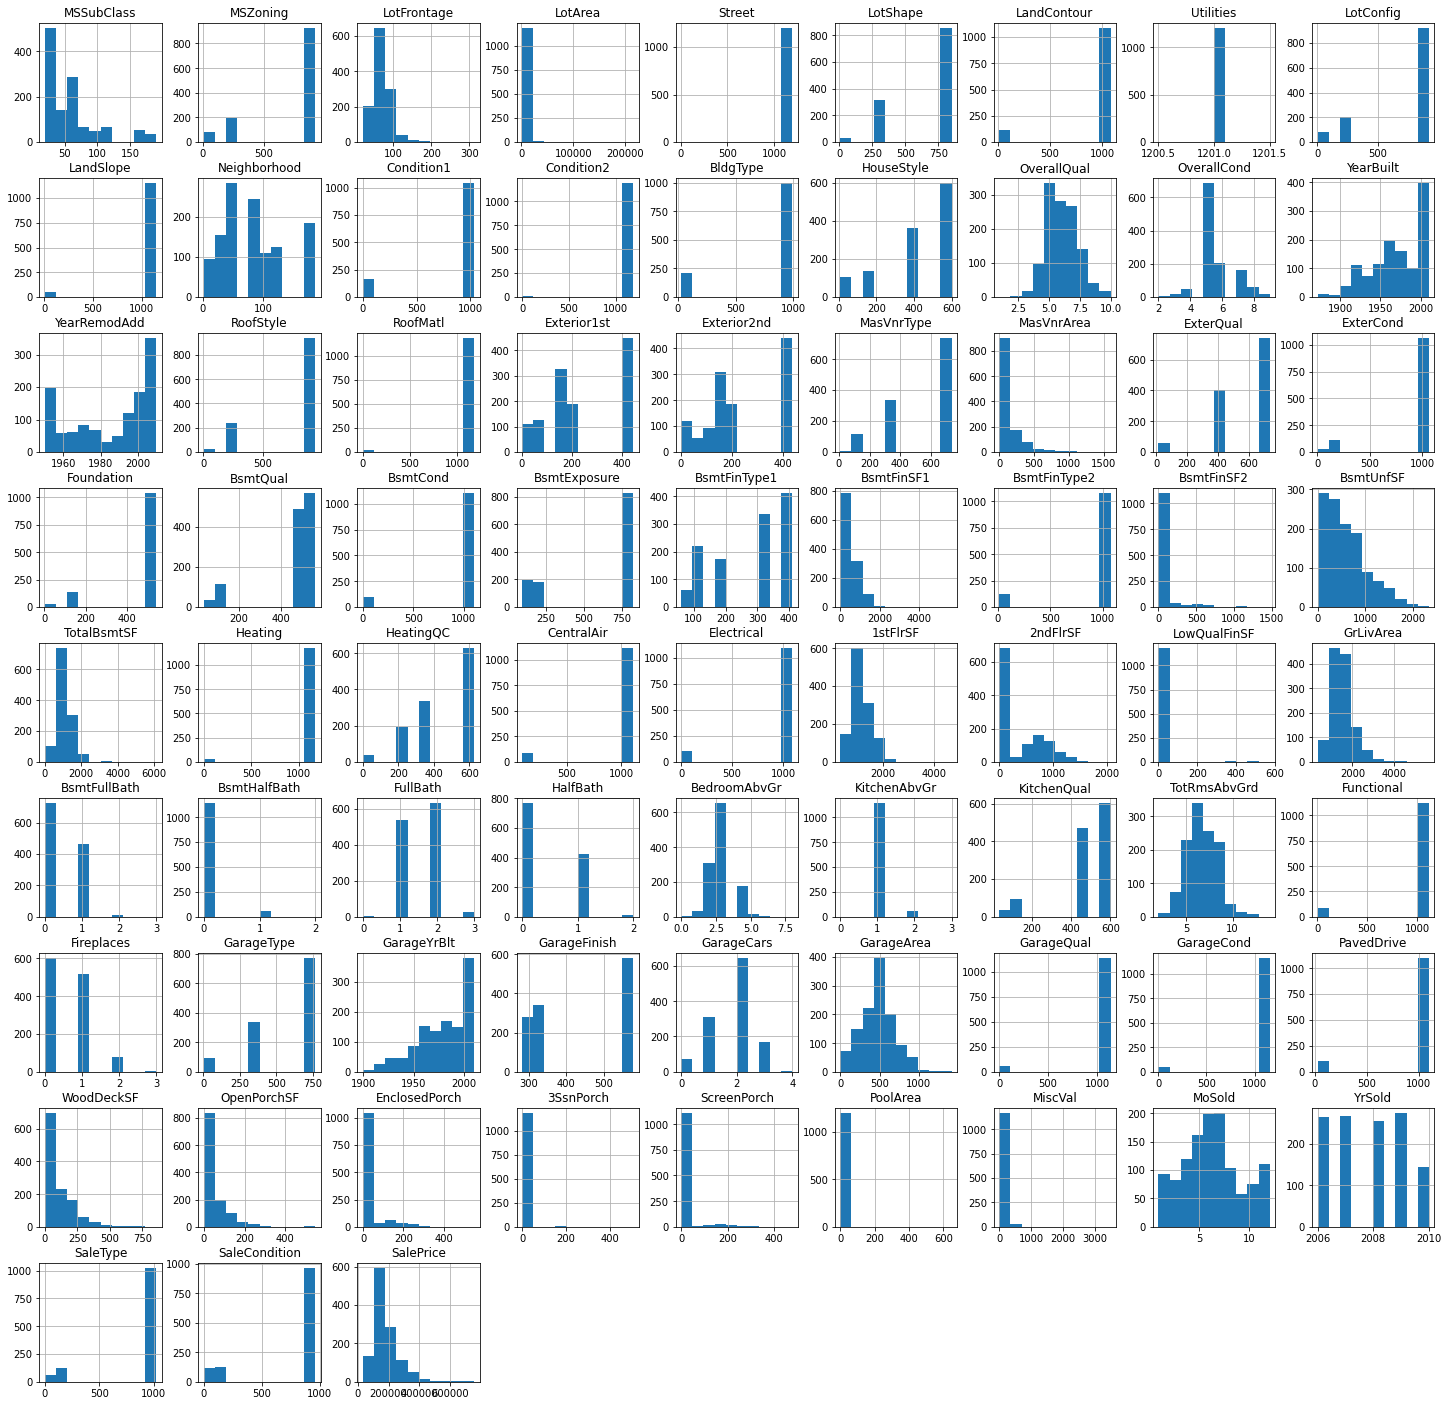

In [15]:
data.hist(figsize=(25,25))
plt.show()

there are an outliers in some columns in data


In [16]:
import numpy as np
for i in data.columns:
    if data[i].dtype!='O':
        median = data[i].median()
        std = data[i].std()
        outliers = (data[i] - median).abs() > std
        data[i][outliers] = np.nan
        data[i].fillna(median, inplace=True)

C:\Users\ACS\AppData\Local\Temp\ipykernel_20836\3362632328.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][outliers] = np.nan
C:\Users\ACS\AppData\Local\Temp\ipykernel_20836\3362632328.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][outliers] = np.nan
C:\Users\ACS\AppData\Local\Temp\ipykernel_20836\3362632328.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][outliers] = np.nan
C:\Users\ACS\AppData\Loca

In [17]:
data=data.drop_duplicates()

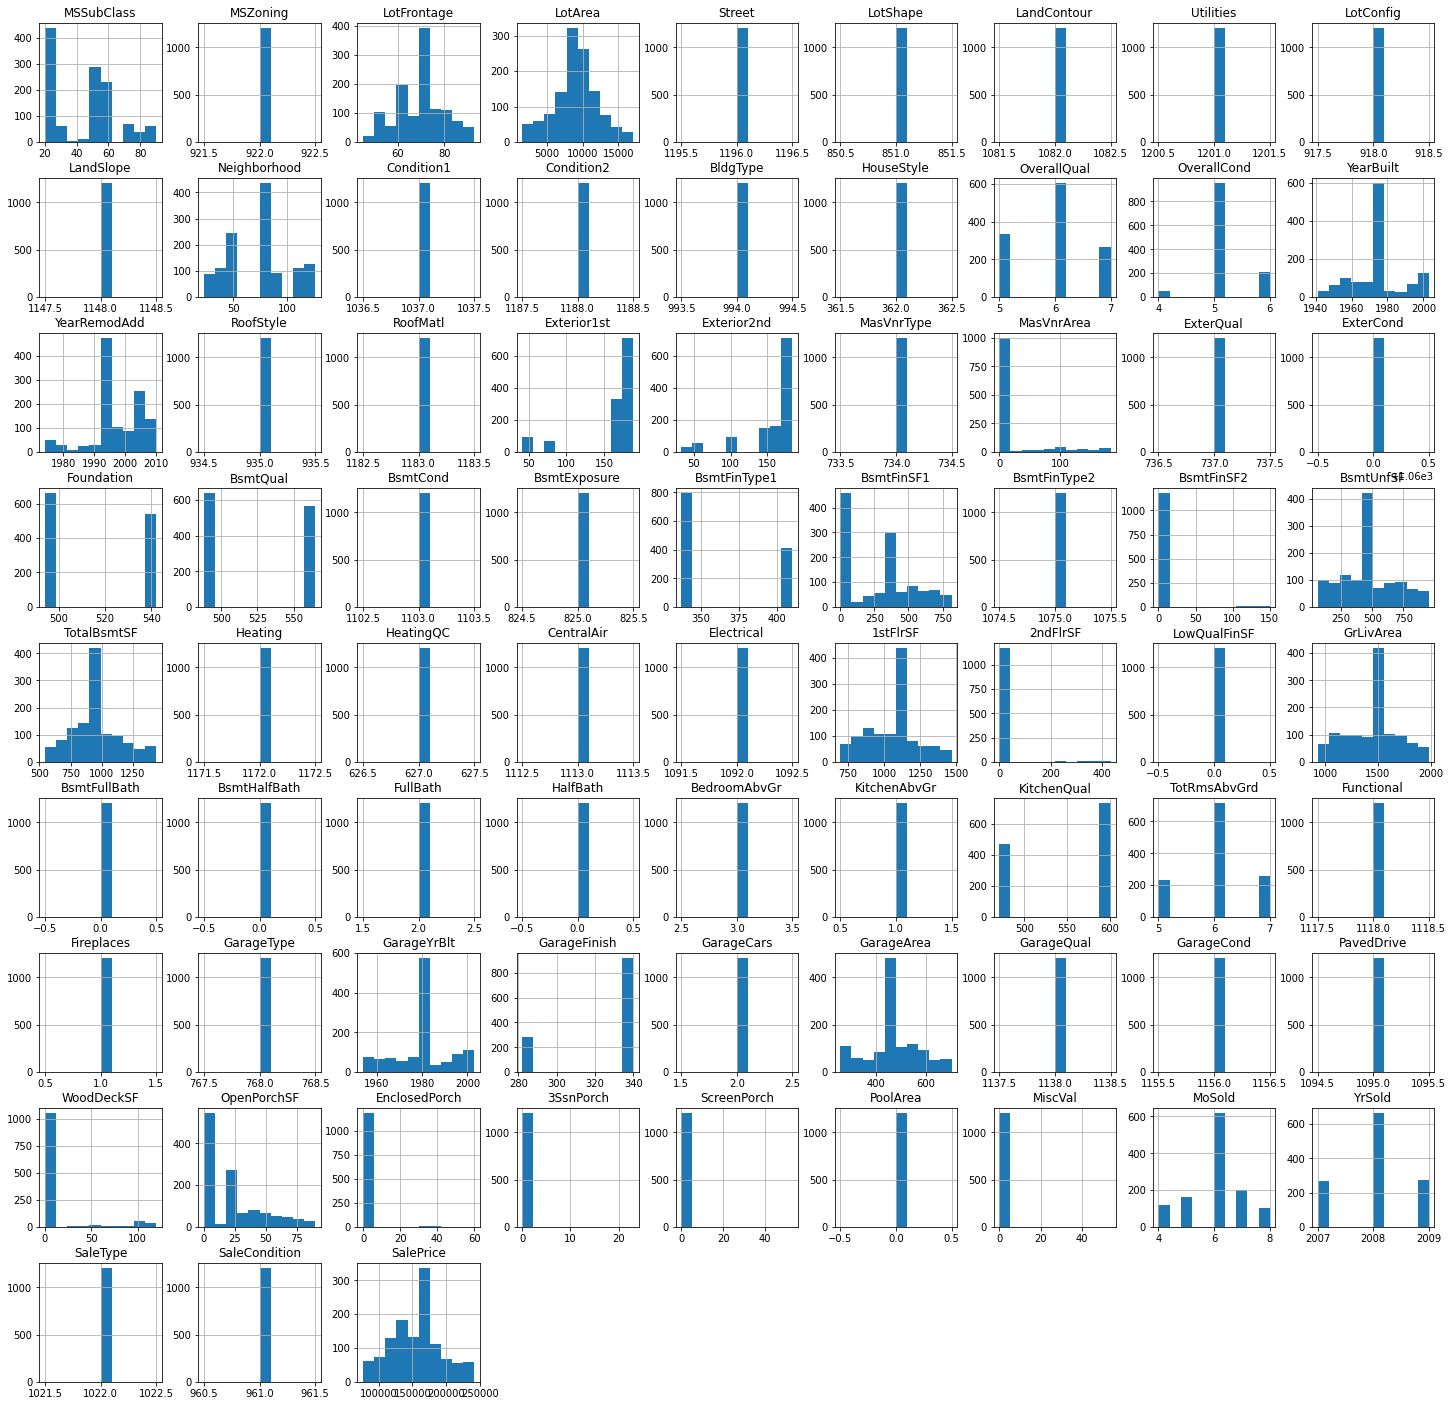

In [18]:
data.hist(figsize=(25,25))
plt.show()

all houses are around the average condiation 

In [19]:
v=[]
for i in data.columns:
    if data[i].nunique()==1:
        v.append(i)
v

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'SaleType',
 'SaleCondition']

In [20]:
v.append('3SsnPorch')

In [21]:
data['MiscVal'].value_counts()

0.0     1200
54.0       1
Name: MiscVal, dtype: int64

In [22]:
miscval0=data[data['MiscVal']!=0.0]
miscval1=data[data['MiscVal']==0.0]
print(miscval0['SalePrice'])
print(miscval1['SalePrice'].mean())

812    159500.0
Name: SalePrice, dtype: float64
154629.64416666667


a house with miscellaneous feature has a bigger price more than the others 

In [23]:
data['ScreenPorch'].value_counts()

0.0     1200
53.0       1
Name: ScreenPorch, dtype: int64

In [24]:
miscval0=data[data['ScreenPorch']!=0.0]
miscval1=data[data['ScreenPorch']==0.0]
print(miscval0['SalePrice'])
print(miscval1['SalePrice'].mean())

1012    165000.0
Name: SalePrice, dtype: float64
154625.06083333332


a house with screen porch has a bigger price more than the others 

In [25]:
data=data.drop({'ScreenPorch','MiscVal'},axis=1)

Utilities=all houses are have all public Utilities ,,
LowQualFinSF=all houses are havenot a bad qulity in all floors ,,
FullBath=all houses are have 2 bathrooms above the grade ,,
BsmtFullBath,BsmtHalfBath=all houses are have not any bathroom in the basment (under the grade),,
HalfBath=all houses are have not any half bathrooms ,,
BedroomAbvGr=all of them has 3 bedroom above grade ((does NOT include basement bedrooms)),
KitchenAbvGr=all of them are have one kitchen above grade ,,
Fireplaces= all of them have a single fire place ,,
GarageCars= all of them have a garage with size 2 cars ,,
PoolArea=all of them is have not a pool area ,, 
and all of this features dont matter in the price


In [26]:
data=data.drop(v,axis=1)

In [27]:
data.shape

(1201, 32)

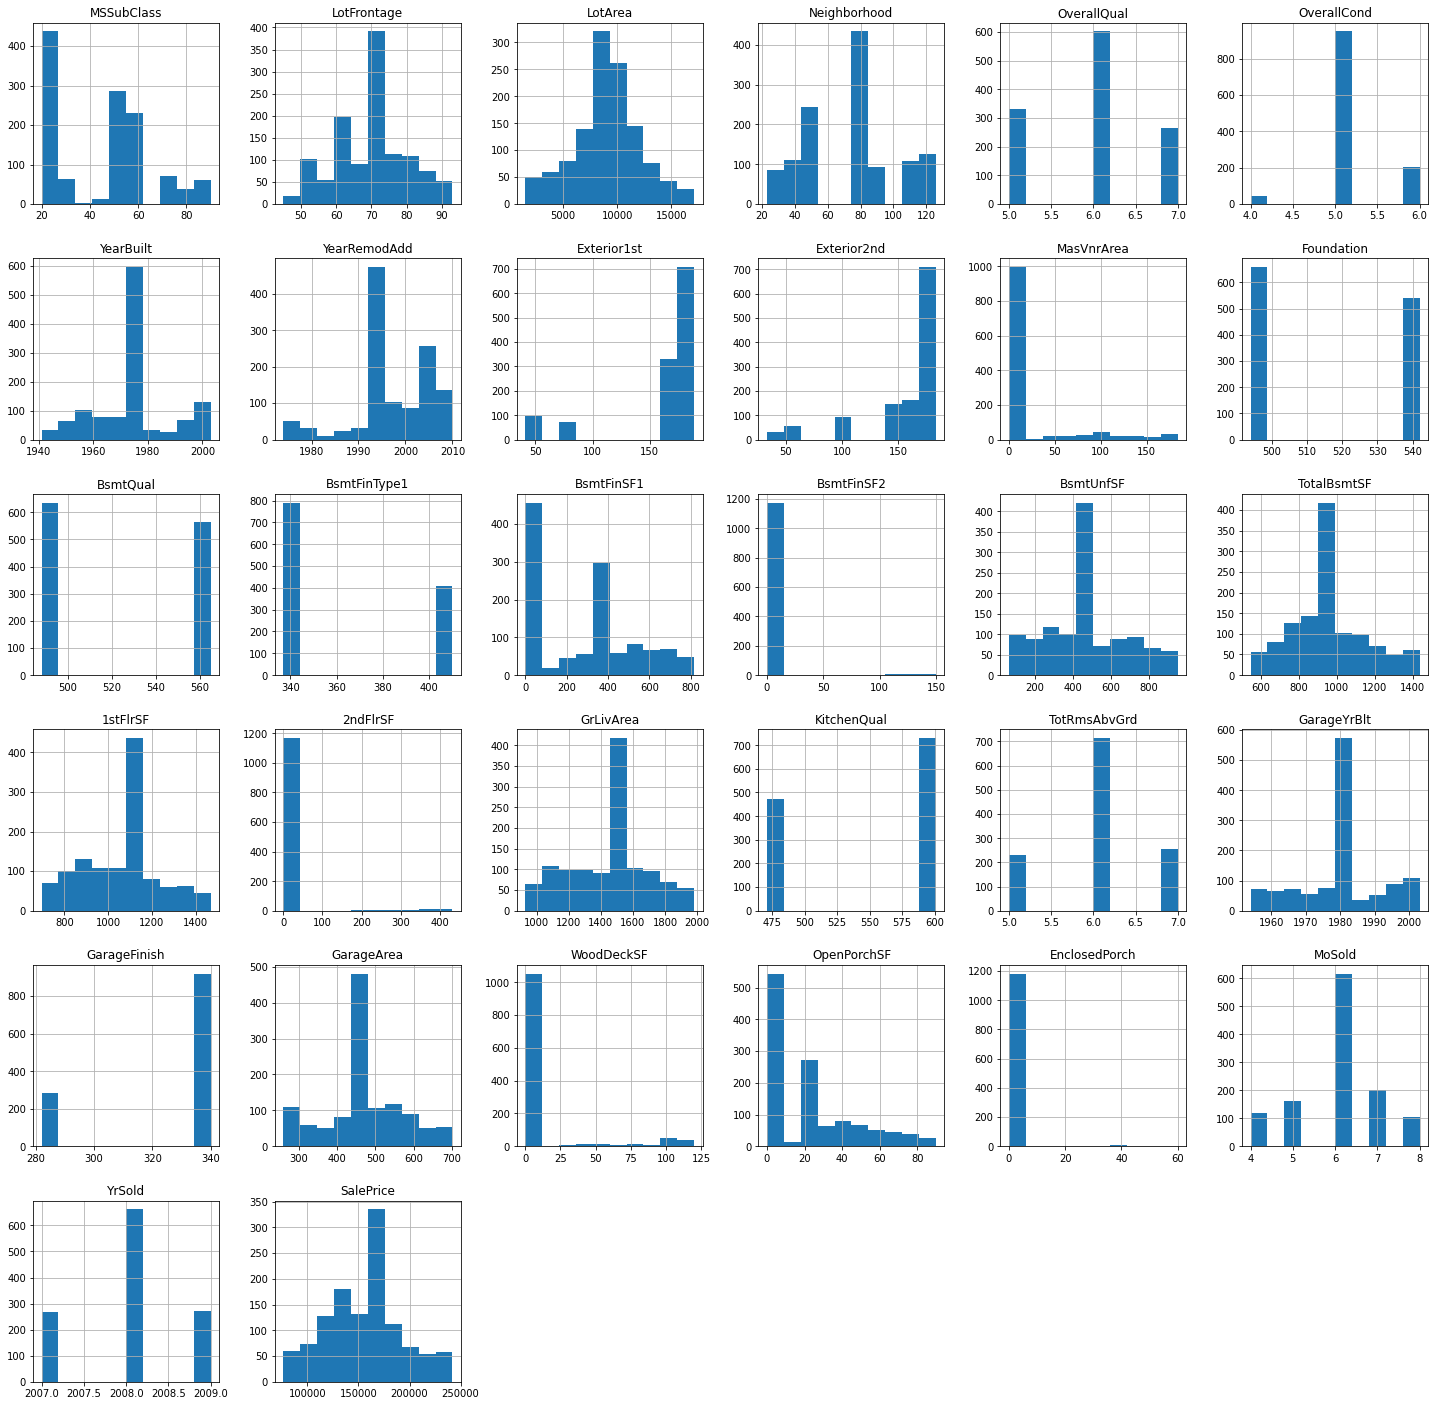

In [28]:
data.hist(figsize=(25,25))
plt.show()

In [29]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.509433
Foundation       0.454323
GrLivArea        0.404727
YearBuilt        0.401298
GarageArea       0.367807
OpenPorchSF      0.350497
GarageYrBlt      0.307224
LotArea          0.294562
TotalBsmtSF      0.281179
TotRmsAbvGrd     0.272673
LotFrontage      0.243631
YearRemodAdd     0.239467
1stFlrSF         0.229865
MasVnrArea       0.185555
Exterior2nd      0.102268
BsmtFinSF1       0.086346
WoodDeckSF       0.068165
MoSold           0.060828
Exterior1st      0.047345
MSSubClass       0.047171
Neighborhood     0.003709
YrSold          -0.005398
BsmtFinSF2      -0.023018
OverallCond     -0.024370
BsmtUnfSF       -0.025245
EnclosedPorch   -0.059547
BsmtFinType1    -0.101043
2ndFlrSF        -0.144985
GarageFinish    -0.251112
KitchenQual     -0.485651
BsmtQual        -0.488271
Name: SalePrice, dtype: float64

In [30]:
data['2ndFlrSF'].value_counts()

0.0      1168
384.0       2
240.0       2
408.0       2
432.0       2
252.0       2
406.0       1
316.0       1
349.0       1
358.0       1
390.0       1
430.0       1
272.0       1
351.0       1
220.0       1
304.0       1
370.0       1
336.0       1
299.0       1
368.0       1
332.0       1
213.0       1
325.0       1
348.0       1
319.0       1
403.0       1
110.0       1
378.0       1
208.0       1
Name: 2ndFlrSF, dtype: int64

In [31]:
data.shape

(1201, 32)

mssubclass is the class of the house and most houses in 20 one floor with 1946 & NEWER ALL STYLES


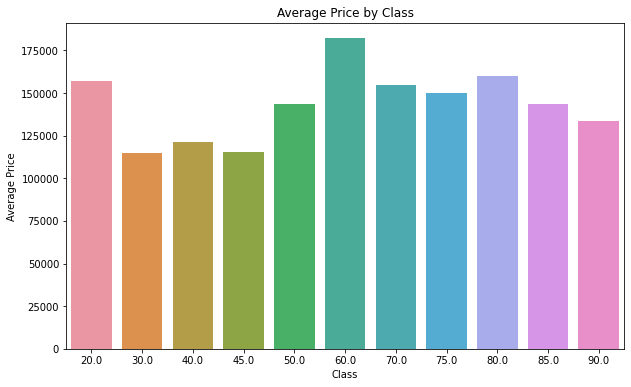

In [32]:
plt.figure(figsize=(10, 6))
average_prices = data.groupby('MSSubClass')['SalePrice'].mean().reset_index()
sns.barplot(x='MSSubClass', y='SalePrice', data=average_prices)
plt.title('Average Price by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()


highest price is the 60 which mean 2-floor with style 1946 and newer 
loss price  is 30 which mean one floor with style 1945 and older 


LotFrontage is the length of street which the house is in it and the most popular value is a 70 feet 

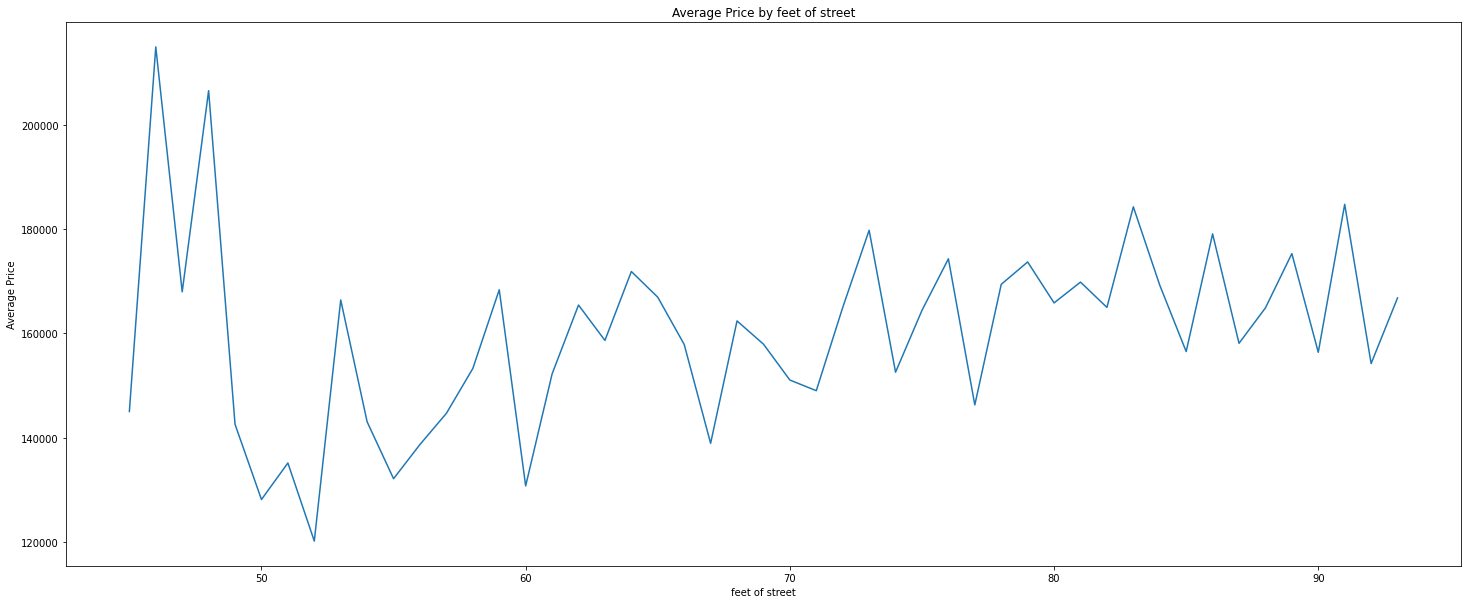

In [33]:
plt.figure(figsize=(25, 10))
average_prices = data.groupby('LotFrontage')['SalePrice'].mean().reset_index()
sns.lineplot(x='LotFrontage', y='SalePrice', data=average_prices)
plt.title('Average Price by feet of street')
plt.xlabel('feet of street')
plt.ylabel('Average Price')
plt.show()


46 feet is highest price
50:52 the less price

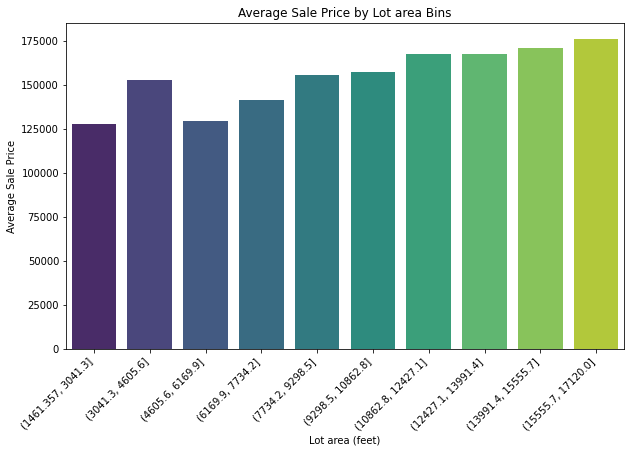

In [34]:

num_bins = 10
# Drop rows where LotFrontage or SalePrice is NaN, as these can cause issues
data = data.dropna(subset=['LotArea', 'SalePrice'])

# Create bins for LotFrontage and calculate the average SalePrice for each bin
data['LotAreaBin'] = pd.cut(data['LotArea'], bins=num_bins)
average_prices = data.groupby('LotAreaBin')['SalePrice'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices['LotAreaBin'].astype(str), y=average_prices['SalePrice'], palette='viridis')
plt.title('Average Sale Price by Lot area Bins')
plt.xlabel('Lot area (feet)')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()


the unit is splited not all of it is live area apove the grade

highest unit area does not have the highest price 
from 110218 feet to 15882 the price almost static 

histogram for the houses with highest prices

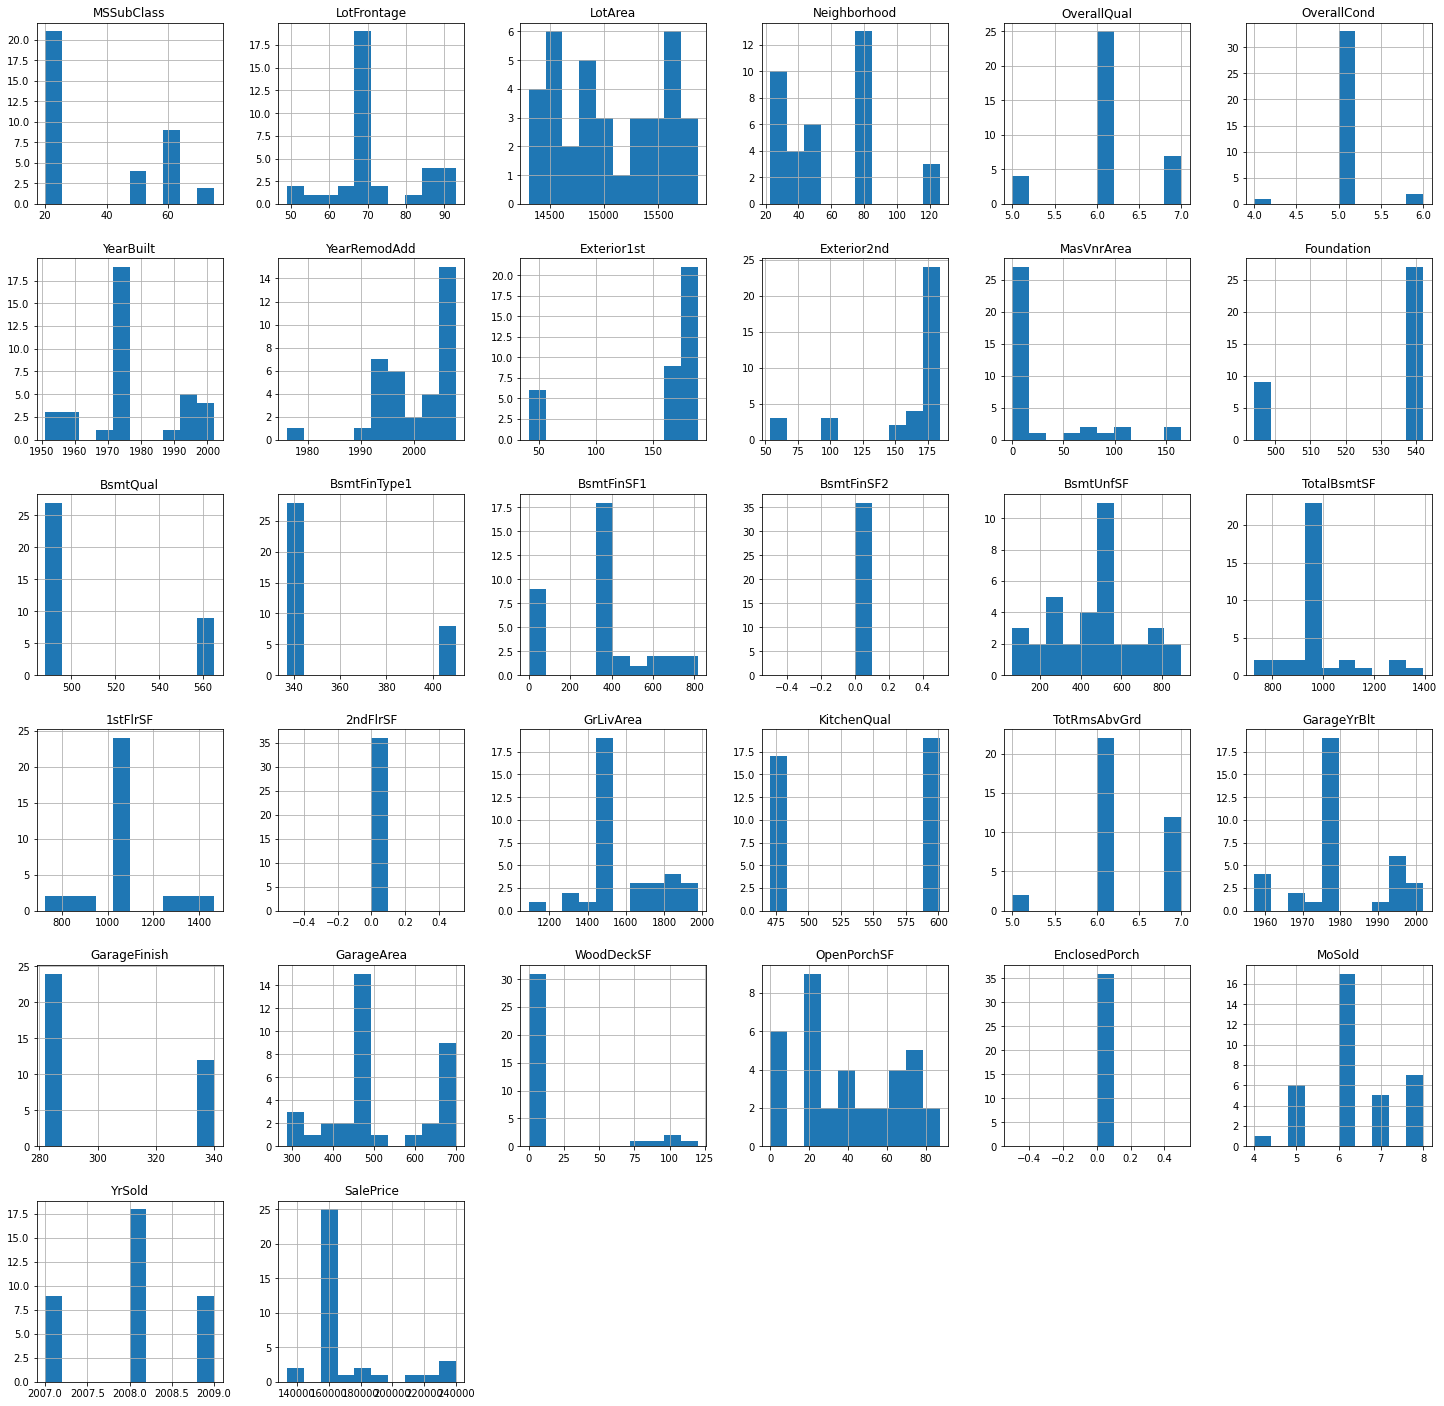

In [35]:
filtered_houses = data[(data['LotArea'] >= 14262) & (data['LotArea'] <= 15882)]
filtered_houses.hist(figsize=(25,25))
plt.show()

In [36]:
data['OverallQual'].unique()

array([7., 6., 5.])

all houses have quality around the avarege and above

year of built ,year of built garage and living area above grade are highest featurs have effect on price

over all condition has a negative effect on price becouse all of them are around avarage and there are which under the avarage 
EnclosedPorch  ,over all condition,BsmtFinSF2 and 2ndFlrSF becouse more than 90% of data around just one value 

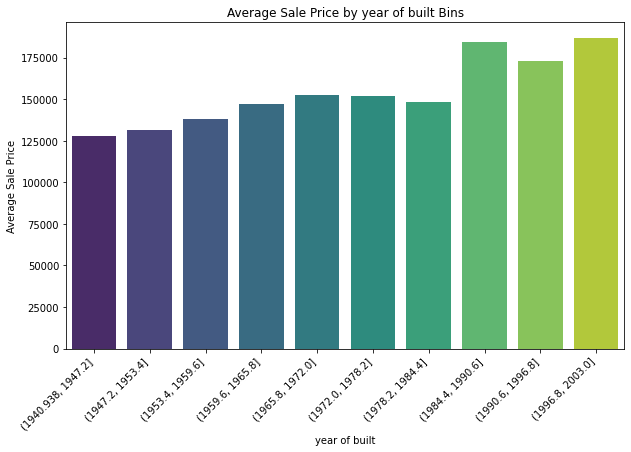

In [37]:

num_bins = 10
# Drop rows where LotFrontage or SalePrice is NaN, as these can cause issues
data = data.dropna(subset=['YearBuilt', 'SalePrice'])

# Create bins for LotFrontage and calculate the average SalePrice for each bin
data['YearBuiltBin'] = pd.cut(data['YearBuilt'], bins=num_bins)
average_prices = data.groupby('YearBuiltBin')['SalePrice'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices['YearBuiltBin'].astype(str), y=average_prices['SalePrice'], palette='viridis')
plt.title('Average Sale Price by year of built Bins')
plt.xlabel('year of built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()


highest price with year of built in range 1987 and 1993 
the houses were had built in this range has agood quality compared by the older and newer 
1975 this year has most houses were built on it

In [38]:
data['YearBuilt'].value_counts()

1972.0    523
2003.0     38
1977.0     22
1959.0     22
1998.0     21
         ... 
1986.0      3
1989.0      2
1983.0      2
1942.0      1
1985.0      1
Name: YearBuilt, Length: 61, dtype: int64

In [39]:
remodel=data[data['YearBuilt']!=data['YearRemodAdd']]
remodel['YearBuilt']

2       2001.0
3       1972.0
5       1993.0
6       1972.0
8       1972.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: YearBuilt, Length: 994, dtype: float64

In [40]:
remodel

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,LotAreaBin,YearBuiltBin
2,60.0,68.0,11250.0,126.0,7.0,5.0,2001.0,2002.0,189.0,184.0,...,340.0,608.0,0.0,42.0,0.0,6.0,2008.0,223500.0,"(10862.8, 12427.1]","(1996.8, 2003.0]"
3,70.0,60.0,9550.0,41.0,7.0,5.0,1972.0,1995.0,168.0,33.0,...,340.0,642.0,0.0,35.0,0.0,6.0,2008.0,140000.0,"(9298.5, 10862.8]","(1965.8, 1972.0]"
5,50.0,85.0,14115.0,36.0,5.0,5.0,1993.0,1995.0,189.0,184.0,...,340.0,480.0,40.0,30.0,0.0,6.0,2009.0,143000.0,"(13991.4, 15555.7]","(1990.6, 1996.8]"
6,20.0,75.0,10084.0,78.0,6.0,5.0,1972.0,2005.0,189.0,184.0,...,340.0,636.0,0.0,57.0,0.0,8.0,2007.0,159500.0,"(9298.5, 10862.8]","(1965.8, 1972.0]"
8,50.0,51.0,6120.0,109.0,7.0,5.0,1972.0,1995.0,41.0,33.0,...,340.0,468.0,90.0,0.0,0.0,4.0,2008.0,129900.0,"(4605.6, 6169.9]","(1965.8, 1972.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,49.0,6.0,5.0,1999.0,2000.0,189.0,184.0,...,340.0,460.0,0.0,40.0,0.0,8.0,2007.0,175000.0,"(7734.2, 9298.5]","(1996.8, 2003.0]"
1456,20.0,85.0,13175.0,45.0,6.0,6.0,1978.0,1988.0,71.0,94.0,...,340.0,500.0,0.0,0.0,0.0,6.0,2008.0,210000.0,"(12427.1, 13991.4]","(1972.0, 1978.2]"
1457,70.0,66.0,9042.0,41.0,7.0,5.0,1941.0,2006.0,54.0,54.0,...,340.0,480.0,0.0,60.0,0.0,5.0,2008.0,159500.0,"(7734.2, 9298.5]","(1940.938, 1947.2]"
1458,20.0,68.0,9717.0,76.0,5.0,6.0,1950.0,1996.0,189.0,184.0,...,340.0,480.0,0.0,0.0,0.0,4.0,2008.0,142125.0,"(9298.5, 10862.8]","(1947.2, 1953.4]"


most houses has a remodeling 

In [41]:

filtered_houses = data[(data['YearBuilt'] >= 1987) & (data['YearBuilt'] <= 1993)]

# Check if YearBuilt is equal to YearRemodeled
same_year_remodeled = filtered_houses[filtered_houses['YearBuilt'] == filtered_houses['YearRemodAdd']]
different_year_remodeled = filtered_houses[filtered_houses['YearBuilt'] != filtered_houses['YearRemodAdd']]

print("Houses where YearBuilt (1987-1993) is equal to YearRemodeled:")
print(len(same_year_remodeled))

print("\nHouses where YearBuilt (1987-1993) is different from YearRemodeled:")
print(len(different_year_remodeled))


Houses where YearBuilt (1987-1993) is equal to YearRemodeled:
25

Houses where YearBuilt (1987-1993) is different from YearRemodeled:
20


In [42]:
same_year_remodeled['SalePrice'].mean()

186980.0

In [43]:
different_year_remodeled['SalePrice'].mean()

176870.0

most houses in this range with highest price has no remodel 

In [44]:
gr=data[data['GarageYrBlt']!=data['YearBuilt']]
len(gr)

708

half of houses has built without garage area 

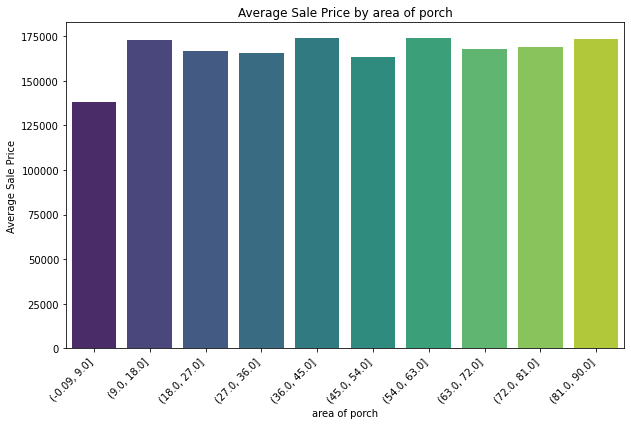

In [45]:

num_bins = 10
# Drop rows where LotFrontage or SalePrice is NaN, as these can cause issues
data = data.dropna(subset=['OpenPorchSF', 'SalePrice'])

# Create bins for LotFrontage and calculate the average SalePrice for each bin
data['OpenPorchSFBin'] = pd.cut(data['OpenPorchSF'], bins=num_bins)
average_prices = data.groupby('OpenPorchSFBin')['SalePrice'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices['OpenPorchSFBin'].astype(str), y=average_prices['SalePrice'], palette='viridis')
plt.title('Average Sale Price by area of porch')
plt.xlabel('area of porch')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()



from 9.2 and above all almost have same range of price 

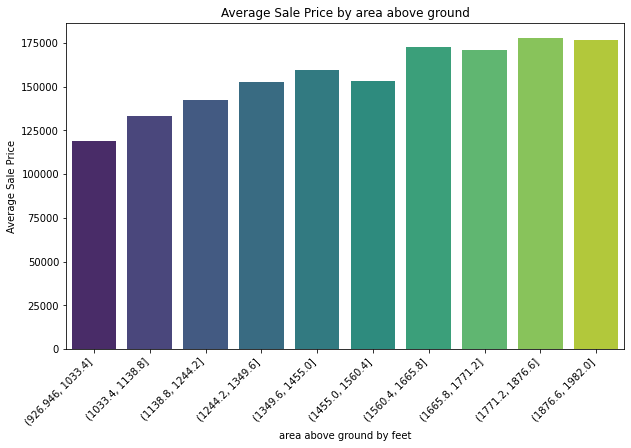

In [46]:



num_bins = 10
# Drop rows where LotFrontage or SalePrice is NaN, as these can cause issues
data = data.dropna(subset=['GrLivArea', 'SalePrice'])

# Create bins for LotFrontage and calculate the average SalePrice for each bin
data['GrLivAreaBin'] = pd.cut(data['GrLivArea'], bins=num_bins)
average_prices = data.groupby('GrLivAreaBin')['SalePrice'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices['GrLivAreaBin'].astype(str), y=average_prices['SalePrice'], palette='viridis')
plt.title('Average Sale Price by area above ground')
plt.xlabel('area above ground by feet')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()



most important feature

In [47]:
high_price=data[data['SalePrice']==248900.0]

data of highest price house

In [48]:
high_price

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,LotAreaBin,YearBuiltBin,OpenPorchSFBin,GrLivAreaBin


MasVnrArea is the external single layer in the outside the house and that doesnot effect in the price

##################################

In [49]:
n=[]
for i in  data.columns:
    if data[i].dtype=="O":
        n.append(i)

Floating Village Residential was highest price 

In [ ]:
data["Street"].value_counts()

Pave    1090
Grvl       4
Name: Street, dtype: int64

pave is highest price
pave is not
grvl is stone road

In [ ]:
cat(data,'LotShape')
print(" General shape of house\nReg	Regular	IR1	Slightly irregular \nIR2	Moderately Irregular  IR3 Irregular")

Average Price, Count, and Percentage by LotShape:
  LotShape   AveragePrice  Count  Percentage
1      IR2  186189.769231     26    2.376600
0      IR1  176669.461794    301   27.513711
2      IR3  168698.571429      7    0.639854
3      Reg  153172.355263    760   69.469835
 General shape of house
Reg	Regular	IR1	Slightly irregular 
IR2	Moderately Irregular  IR3 Irregular


IR2	Moderately Irregular is high in pricing

In [ ]:
data[n[3]].value_counts()

Lvl    991
Bnk     45
HLS     44
Low     14
Name: LandContour, dtype: int64

In [ ]:
cat(data,'LandContour')
print("Flatness of the property\n Lvl	Near Flat/Level	 Bnk Banked - Quick and significant rise from street grade to building\n HLS	Hillside - Significant slope from side to side  Low 	Depression")

Average Price, Count, and Percentage by LandContour:
  LandContour   AveragePrice  Count  Percentage
1         HLS  170790.363636     44    4.021938
3         Lvl  160585.624622    991   90.585009
2         Low  159339.285714     14    1.279707
0         Bnk  149432.044444     45    4.113346
Flatness of the property
 Lvl	Near Flat/Level	 Bnk Banked - Quick and significant rise from street grade to building
 HLS	Hillside - Significant slope from side to side  Low 	Depression


In [ ]:
data[n[4]].value_counts()

Inside     830
Corner     187
CulDSac     44
FR2         29
FR3          4
Name: LotConfig, dtype: int64

In [ ]:
cat(data,n[4])
print("Inside	Inside lotCorner	Corner lotCulDSac	Cul-de-sac\n FR2	Frontage on 2 sides of property FR3	Frontage on 3 sides of property")

Average Price, Count, and Percentage by LotConfig:
  LotConfig   AveragePrice  Count  Percentage
1   CulDSac  184383.772727     44    4.021938
3       FR3  171162.500000      4    0.365631
2       FR2  165872.689655     29    2.650823
4    Inside  159557.213253    830   75.868373
0    Corner  158128.294118    187   17.093236
Inside	Inside lotCorner	Corner lotCulDSac	Cul-de-sac
 FR2	Frontage on 2 sides of property FR3	Frontage on 3 sides of property


In [ ]:
cat(data,n[5])
print("Gtl	low sloop \nslopeMod	Moderate Slope\nSev	high Slop	")

Average Price, Count, and Percentage by LandSlope:
  LandSlope   AveragePrice  Count  Percentage
0       Gtl  160674.991388   1045   95.521024
2       Sev  158746.000000      5    0.457038
1       Mod  157073.318182     44    4.021938
Gtl	low sloop 
slopeMod	Moderate Slope
Sev	high Slop	


In [ ]:
cat(data,n[6])

Average Price, Count, and Percentage by Neighborhood:
   Neighborhood   AveragePrice  Count  Percentage
24      Veenker  189892.857143      7    0.639854
4       ClearCr  188090.909091     11    1.005484
5       CollgCr  185639.614754    122   11.151737
21      Somerst  184842.693333     75    6.855576
0       Blmngtn  184732.428571     14    1.279707
8       Gilbert  182462.877551     49    4.478976
23       Timber  181841.379310     29    2.650823
14       NWAmes  179600.000000     45    4.113346
20      SawyerW  177696.295455     44    4.021938
22      StoneBr  177212.500000     20    1.828154
16      NridgHt  174049.121622     74    6.764168
6       Crawfor  170576.512195     41    3.747715
15      NoRidge  168159.090909     33    3.016453
11      Mitchel  158937.866667     30    2.742230
18        SWISU  147507.052632     19    1.736746
12        NAmes  146719.265896    173   15.813528
13      NPkVill  144642.857143      7    0.639854
3       BrkSide  141176.785714     42    3.839

In [ ]:
cat(data,n[7])
print(" Proximity to various conditions\nArtery	Adjacent to arterial street\nFeedr	Adjacent to feeder street	\nNorm	Normal	\nRRNn	Within 200' of North-South Railroad\nRRAn	Adjacent to North-South Railroad\nPosN	Near positive off-site feature--park, greenbelt, etc.\nPosA	Adjacent to postive off-site feature\nRRNe	Within 200' of East-West Railroad\nRRAe	Adjacent to East-West Railroad")

Average Price, Count, and Percentage by Condition1:
  Condition1   AveragePrice  Count  Percentage
3       PosA  196937.500000      4    0.365631
7       RRNe  187000.000000      1    0.091408
4       PosN  173250.000000      9    0.822669
6       RRAn  165883.541667     24    2.193784
2       Norm  161853.887368    950   86.837294
1      Feedr  154257.192308     52    4.753199
8       RRNn  142375.000000      4    0.365631
5       RRAe  138612.500000      8    0.731261
0     Artery  134146.428571     42    3.839122
 Proximity to various conditions
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street	
Norm	Normal	
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad


Near positive off-site feature--park, greenbelt has a hoghest price 


In [ ]:
cat(data,n[8])

Average Price, Count, and Percentage by Condition2:
  Condition2   AveragePrice  Count  Percentage
4       PosN  175250.000000      2    0.182815
3       PosA  165750.000000      1    0.091408
2       Norm  160685.833641   1082   98.903108
1      Feedr  145650.000000      5    0.457038
5       RRNn  145375.000000      2    0.182815
0     Artery  106500.000000      2    0.182815


In [ ]:
data['Condition']=data['Condition1']+ "+"+data['Condition2']

In [ ]:
cat(data,'Condition')

Average Price, Count, and Percentage by Condition:
        Condition   AveragePrice  Count  Percentage
6       PosA+Norm  196937.500000      4    0.365631
12      RRNe+Norm  187000.000000      1    0.091408
8       PosN+PosN  175250.000000      2    0.182815
7       PosN+Norm  172678.571429      7    0.639854
11      RRAn+Norm  169047.750000     20    1.828154
2     Artery+PosA  165750.000000      1    0.091408
5       Norm+Norm  161853.887368    950   86.837294
3      Feedr+Norm  154612.480000     50    4.570384
10     RRAn+Feedr  150062.500000      4    0.365631
14      RRNn+Norm  147166.666667      3    0.274223
4      Feedr+RRNn  145375.000000      2    0.182815
9       RRAe+Norm  138612.500000      8    0.731261
1     Artery+Norm  134753.846154     39    3.564899
13     RRNn+Feedr  128000.000000      1    0.091408
0   Artery+Artery  106500.000000      2    0.182815


In [ ]:
cat(data,n[9])
print("\n1Fam	Single-family Detached	\n2FmCon	Two-family Conversion; originally built as one-family dwelling\nDuplx	Duplex\nTwnhsE	Townhouse End Unit\nTwnhsI	Townhouse Inside Unit")

Average Price, Count, and Percentage by BldgType:
  BldgType   AveragePrice  Count  Percentage
4   TwnhsE  165768.433333     90    8.226691
0     1Fam  161806.234595    925   84.552102
2   Duplex  144599.833333     24    2.193784
3    Twnhs  141984.285714     35    3.199269
1   2fmCon  129027.500000     20    1.828154

1Fam	Single-family Detached	
2FmCon	Two-family Conversion; originally built as one-family dwelling
Duplx	Duplex
TwnhsE	Townhouse End Unit
TwnhsI	Townhouse Inside Unit


In [ ]:
data.shape

(1094, 66)

In [ ]:
cat(data,n[10])
print(" \n1floor	One floor\n1.5Fin	One and one-half floor: 2nd level finished\n1.5Unf	One and one-half floor: 2nd level unfinished\n2floor	Two floor\n2.5Fin	Two and one-half floor: 2nd level finished\n2.5Unf	Two and one-half floor: 2nd level unfinished\nSFoyer	Split Foyer\nSLvl	Split Level")

Average Price, Count, and Percentage by HouseStyle:
  HouseStyle   AveragePrice  Count  Percentage
5     2Story  171438.878613    346   31.627057
3     2.5Fin  169583.333333      6    0.548446
2     1Story  160028.107407    540   49.360146
7       SLvl  157195.348837     43    3.930530
0     1.5Fin  140511.504274    117   10.694698
6     SFoyer  140010.695652     23    2.102377
4     2.5Unf  136572.222222      9    0.822669
1     1.5Unf  121115.000000     10    0.914077
 
1floor	One floor
1.5Fin	One and one-half floor: 2nd level finished
1.5Unf	One and one-half floor: 2nd level unfinished
2floor	Two floor
2.5Fin	Two and one-half floor: 2nd level finished
2.5Unf	Two and one-half floor: 2nd level unfinished
SFoyer	Split Foyer
SLvl	Split Level


In [ ]:
cat(data,n[11])

Average Price, Count, and Percentage by RoofStyle:
  RoofStyle   AveragePrice  Count  Percentage
0      Flat  191850.000000      5    0.457038
4   Mansard  170791.666667      6    0.548446
1     Gable  160477.562278    843   77.056673
3       Hip  159803.204348    230   21.023766
2   Gambrel  158900.000000     10    0.914077


In [ ]:
cat(data,n[12])

print("\nClyTile	Clay or Tile\nCompShg	Standard (Composite) Shingle\nMembran	Membrane\nMetal	Metal\nRoll	Roll\nTar&Grv	Gravel & Tar\nWdShake	Wood Shakes\nWdShngl	Wood Shingles")

Average Price, Count, and Percentage by RoofMatl:
  RoofMatl   AveragePrice  Count  Percentage
2  Membran  241500.000000      1    0.091408
5  WdShake  216000.000000      2    0.182815
4  Tar&Grv  176550.000000      5    0.457038
6  WdShngl  166208.333333      6    0.548446
1  CompShg  160259.575139   1078   98.537477
0  ClyTile  160000.000000      1    0.091408
3     Roll  137000.000000      1    0.091408

ClyTile	Clay or Tile
CompShg	Standard (Composite) Shingle
Membran	Membrane
Metal	Metal
Roll	Roll
Tar&Grv	Gravel & Tar
WdShake	Wood Shakes
WdShngl	Wood Shingles


In [ ]:
data['Exterior']=data['Exterior1st']+" +"+data['Exterior2nd']

In [ ]:
cat(data,'Exterior')
print("Exterior covering on house\nAsbShng	Asbestos Shingles\nAsphShn	Asphalt Shingles\nBrkComm	Brick Common\nBrkFace	Brick Face\nCBlock	Cinder Block\nCemntBd	Cement Board\nHdBoard	Hard Board\nImStucc	Imitation Stucco\nMetalSd	Metal Siding\nOther	Other\nPlywood	Plywood\nPreCast	PreCast	\nStone	Stone\nStucco	Stucco\nVinylSd	Vinyl Siding\nWd Sdng	Wood Siding\nWdShing	Wood Shingles"	)

Average Price, Count, and Percentage by Exterior:
            Exterior   AveragePrice  Count  Percentage
49   Wd Sdng +Stucco  239000.000000      1    0.091408
31      Stone +Stone  230000.000000      1    0.091408
4   BrkFace +AsbShng  225000.000000      1    0.091408
25  MetalSd +Wd Sdng  189000.000000      1    0.091408
39  VinylSd +Plywood  184000.000000      1    0.091408
48  Wd Sdng +Plywood  181333.333333      3    0.274223
41  VinylSd +VinylSd  177478.982968    411   37.568556
8     BrkFace +Stone  177000.000000      1    0.091408
14  HdBoard +AsphShn  175000.000000      1    0.091408
7   BrkFace +Plywood  169125.000000      4    0.365631
43  VinylSd +Wd Shng  167500.000000      3    0.274223
29  Plywood +Plywood  167291.592593     54    4.936015
30  Plywood +Wd Sdng  167125.000000      2    0.182815
44  Wd Sdng +AsbShng  165750.000000      1    0.091408
38    VinylSd +Other  165750.000000      1    0.091408
37  VinylSd +ImStucc  165750.000000      1    0.091408
20  ImStucc +Im

In [ ]:
cat(data,n[15])
print("Masonry veneer type\nBrkCmn	Brick Common\nBrkFace	Brick Face\nCBlock	Cinder Block\nNone	None\nStone	Stone")

Average Price, Count, and Percentage by MasVnrType:
  MasVnrType   AveragePrice  Count  Percentage
3      Stone  178023.504202    119   10.877514
1    BrkFace  169959.186544    327   29.890311
2       None  152783.881064    639   58.409506
0     BrkCmn  135552.333333      9    0.822669
Masonry veneer type
BrkCmn	Brick Common
BrkFace	Brick Face
CBlock	Cinder Block
None	None
Stone	Stone


In [ ]:
cat(data,n[16])
print( "Evaluates the quality of the material on the exterior \nEx	Excell\nGd	Good\nTA	Average/Typical\nFa	Fair\nPo	Poor")

Average Price, Count, and Percentage by ExterQual:
  ExterQual   AveragePrice  Count  Percentage
2        Gd  184333.440506    395   36.106033
0        Ex  166271.739130     46    4.204753
3        TA  145855.825077    646   59.049360
1        Fa  132464.285714      7    0.639854
Evaluates the quality of the material on the exterior 
Ex	Excell
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor


In [ ]:
cat(data,n[17])
print("Evaluates the present condition of the material on the exterior")

Average Price, Count, and Percentage by ExterCond:
  ExterCond   AveragePrice  Count  Percentage
0        Ex  163375.000000      2    0.182815
3        TA  161109.760534    973   88.939671
2        Gd  156161.298077    104    9.506399
1        Fa  152200.000000     15    1.371115
Evaluates the present condition of the material on the exterior


In [ ]:
cat(data,n[18])
print("BrkTil	Brick & Tile\nCBlock	Cinder Block\nPConc	Poured Contrete	")

Average Price, Count, and Percentage by Foundation:
  Foundation   AveragePrice  Count  Percentage
2      PConc  177886.083012    518   47.349177
4       Wood  153500.000000      2    0.182815
1     CBlock  146103.156951    446   40.767824
0     BrkTil  140996.286885    122   11.151737
3      Stone  132462.666667      6    0.548446
BrkTil	Brick & Tile
CBlock	Cinder Block
PConc	Poured Contrete	


In [ ]:
cat(data,n[19])
print("basment quality")

Average Price, Count, and Percentage by BsmtQual:
  BsmtQual   AveragePrice  Count  Percentage
2       Gd  180823.298056    463   42.321755
0       Ex  170722.893805    113   10.329068
3       TA  140796.351852    486   44.424132
1       Fa  130325.656250     32    2.925046
basment quality


In [ ]:
cat(data,n[20])
print("basment statues")

Average Price, Count, and Percentage by BsmtCond:
  BsmtCond   AveragePrice  Count  Percentage
1       Gd  176041.823529     51    4.661792
2       Po  165750.000000      1    0.091408
3       TA  160675.734592   1006   91.956124
0       Fa  134073.611111     36    3.290676
basment statues


In [ ]:
cat(data,n[21])
print("refers to walkout or garden level walls")

Average Price, Count, and Percentage by BsmtExposure:
  BsmtExposure   AveragePrice  Count  Percentage
1           Gd  171371.030928     97    8.866545
0           Av  171196.178161    174   15.904936
2           Mn  163432.505618     89    8.135283
3           No  156203.956403    734   67.093236
refers to walkout or garden level walls


In [ ]:
data['BsmtFin']=data['BsmtFinType1']+"+"+data['BsmtFinType2']

In [ ]:
cat(data,'BsmtFin')
print("\nRating of basement finished are\nGLQ	Good Living Quarters\nALQ	Average Living Quarters\nBLQ	Below Average Living Quarters	\nRec	Average Rec Room\nLwQ	Low Quality\nUnf	Unfinshed\nNA	No Basement")

Average Price, Count, and Percentage by BsmtFin:
    BsmtFin   AveragePrice  Count  Percentage
6   BLQ+GLQ  206250.000000      4    0.365631
1   ALQ+GLQ  185000.000000      2    0.182815
13  GLQ+Rec  182475.000000      5    0.457038
17  LwQ+GLQ  179083.333333      6    0.548446
14  GLQ+Unf  178133.635179    307   28.062157
10  GLQ+ALQ  174916.666667      3    0.274223
12  GLQ+LwQ  173342.857143      7    0.639854
2   ALQ+LwQ  166965.000000     10    0.914077
20  Rec+ALQ  160300.000000      3    0.274223
24  Unf+Unf  159628.521866    343   31.352834
3   ALQ+Rec  157066.666667     15    1.371115
4   ALQ+Unf  152830.284553    123   11.243144
15  LwQ+ALQ  147957.142857      7    0.639854
23  Rec+Unf  145847.244186     86    7.861060
9   BLQ+Unf  144891.666667     78    7.129799
0   ALQ+BLQ  144591.666667     12    1.096892
5   BLQ+BLQ  143000.000000      1    0.091408
7   BLQ+LwQ  140212.500000     12    1.096892
11  GLQ+BLQ  138500.000000      1    0.091408
21  Rec+BLQ  137675.000000     

In [ ]:
cat(data,n[24])
print("Floor	Floor Furnace\nGasA	Gas forced warm air furnace\nGasW	Gas hot water or steam heat\nGrav	Gravity furnace	\nOthW	Hot water or steam heat other than gas\nWall	Wall furnace")

Average Price, Count, and Percentage by Heating:
  Heating   AveragePrice  Count  Percentage
0    GasA  160758.997209   1075   98.263254
1    GasW  150165.625000     16    1.462523
2    Grav  131125.000000      2    0.182815
3    OthW  129500.000000      1    0.091408
Floor	Floor Furnace
GasA	Gas forced warm air furnace
GasW	Gas hot water or steam heat
Grav	Gravity furnace	
OthW	Hot water or steam heat other than gas
Wall	Wall furnace


In [ ]:
cat(data,n[25])
print("heating quality and statues")

Average Price, Count, and Percentage by HeatingQC:
  HeatingQC   AveragePrice  Count  Percentage
0        Ex  173575.000000    594   54.296161
2        Gd  152206.637931    174   15.904936
4        TA  141487.808725    298   27.239488
1        Fa  139720.370370     27    2.468007
3        Po   87000.000000      1    0.091408
heating quality and statues


In [ ]:
cat(data,n[26])

Average Price, Count, and Percentage by CentralAir:
  CentralAir   AveragePrice  Count  Percentage
1          Y  162232.305019   1036   94.698355
0          N  129959.551724     58    5.301645


In [ ]:
cat(data,n[27])
print("\nSBrkr	Standard Circuit Breakers & Romex\nFuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	\nFuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)\nFuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)\nMix	Mixed")

Average Price, Count, and Percentage by Electrical:
  Electrical   AveragePrice  Count  Percentage
3        Mix  165750.000000      1    0.091408
4      SBrkr  162585.114965   1009   92.230347
2      FuseP  151375.000000      2    0.182815
0      FuseA  136641.850746     67    6.124314
1      FuseF  129229.133333     15    1.371115

SBrkr	Standard Circuit Breakers & Romex
FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
Mix	Mixed


In [ ]:
cat(data,n[28])

Average Price, Count, and Percentage by KitchenQual:
  KitchenQual   AveragePrice  Count  Percentage
2          Gd  180327.887665    454   41.499086
0          Ex  169287.692308     91    8.318099
3          TA  142995.134470    528   48.263254
1          Fa  134992.857143     21    1.919561


In [ ]:
cat(data,n[29])
print("       \nTyp	Typical Functionality\nMin1    Minor Deductions 1\nMin2	Minor Deductions 2\nMod	Moderate Deductions\nMaj1	Major Deductions 1\nMaj2	Major Deductions 2\nSev	Severely Damaged\nSal	Salvage only")

Average Price, Count, and Percentage by Functional:
  Functional   AveragePrice  Count  Percentage
4        Mod  171065.000000     10    0.914077
5        Typ  161623.507812   1024   93.601463
0       Maj1  148390.000000     10    0.914077
2       Min1  143107.142857     21    1.919561
3       Min2  137292.000000     25    2.285192
1       Maj2  118937.500000      4    0.365631
       
Typ	Typical Functionality
Min1    Minor Deductions 1
Min2	Minor Deductions 2
Mod	Moderate Deductions
Maj1	Major Deductions 1
Maj2	Major Deductions 2
Sev	Severely Damaged
Sal	Salvage only


In [ ]:
cat(data,n[30])

Average Price, Count, and Percentage by GarageType:
  GarageType   AveragePrice  Count  Percentage
3    BuiltIn  171715.587302     63    5.758684
1     Attchd  171482.388235    680   62.157221
2    Basment  155316.666667     15    1.371115
0     2Types  147940.000000      5    0.457038
5     Detchd  136498.944615    325   29.707495
4    CarPort  125434.833333      6    0.548446


In [ ]:
cat(data,n[31])
print("\nInterior finish of the garage\n\nFin	Finished\nRFn	Rough Finished	\nUnf	Unfinished\n")

Average Price, Count, and Percentage by GarageFinish:
  GarageFinish   AveragePrice  Count  Percentage
1          RFn  177755.747748    333   30.438757
0          Fin  175771.931159    276   25.228519
2          Unf  140009.494845    485   44.332724

Interior finish of the garage

Fin	Finished
RFn	Rough Finished	
Unf	Unfinished



In [ ]:
cat(data,n[32])

Average Price, Count, and Percentage by GarageQual:
  GarageQual   AveragePrice  Count  Percentage
2         Gd  170225.454545     11    1.005484
4         TA  161921.504365   1031   94.241316
0         Ex  137916.666667      3    0.274223
3         Po  133083.333333      3    0.274223
1         Fa  130081.978261     46    4.204753


In [ ]:
cat(data,n[33])

Average Price, Count, and Percentage by GarageCond:
  GarageCond   AveragePrice  Count  Percentage
4         TA  161782.410476   1050   95.978062
2         Gd  150080.000000      5    0.457038
1         Fa  129133.580645     31    2.833638
0         Ex  124000.000000      2    0.182815
3         Po  122875.000000      6    0.548446


garage quality doesnot matter to much in the price
Garage Type is most important to price more than roof style 

In [ ]:
cat(data,n[34])
print("\nPaved driveway\n Y	Paved \n P	Partial Pavement\n N	Dirt/Gravel")

Average Price, Count, and Percentage by PavedDrive:
  PavedDrive   AveragePrice  Count  Percentage
2          Y  162057.043011   1023   93.510055
0          N  140046.187500     48    4.387569
1          P  134945.652174     23    2.102377

Paved driveway
 Y	Paved 
 P	Partial Pavement
 N	Dirt/Gravel


In [ ]:
cat(data,n[35])
print(" \nWD 	Warranty Deed - Conventional\nCWD	Warranty Deed - Cash\nVWD	Warranty Deed - VA Loan\nNew	Home just constructed and sold\nCOD	Court Officer Deed/Estate\nCon	Contract 15% Down payment regular terms\nConLw	Contract Low Down payment and low interest\nConLI	Contract Low Interest\nConLD	Contract Low Down\nOth	Other")

Average Price, Count, and Percentage by SaleType:
  SaleType   AveragePrice  Count  Percentage
2      Con  190475.000000      2    0.182815
6      New  181530.439655    116   10.603291
1      CWD  169812.500000      4    0.365631
3    ConLD  165175.600000      5    0.457038
5    ConLw  164625.000000      4    0.365631
8       WD  158661.490302    928   84.826325
0      COD  137211.290323     31    2.833638
4    ConLI  133583.333333      3    0.274223
7      Oth  116050.000000      1    0.091408
 
WD 	Warranty Deed - Conventional
CWD	Warranty Deed - Cash
VWD	Warranty Deed - VA Loan
New	Home just constructed and sold
COD	Court Officer Deed/Estate
Con	Contract 15% Down payment regular terms
ConLw	Contract Low Down payment and low interest
ConLI	Contract Low Interest
ConLD	Contract Low Down
Oth	Other


In [ ]:
cat(data,n[36])

Average Price, Count, and Percentage by SaleCondition:
  SaleCondition   AveragePrice  Count  Percentage
5       Partial  181097.974790    119   10.877514
4        Normal  159586.611364    880   80.438757
2        Alloca  148261.166667      6    0.548446
3        Family  147166.666667     18    1.645338
0       Abnorml  142269.685714     70    6.398537
1       AdjLand  126000.000000      1    0.091408


top correlation in both numeric and categorical data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1094 non-null   float64 
 1   MSZoning        1094 non-null   object  
 2   LotFrontage     1094 non-null   float64 
 3   LotArea         1094 non-null   float64 
 4   Street          1094 non-null   object  
 5   LotShape        1094 non-null   object  
 6   LandContour     1094 non-null   object  
 7   LotConfig       1094 non-null   object  
 8   LandSlope       1094 non-null   object  
 9   Neighborhood    1094 non-null   object  
 10  Condition1      1094 non-null   object  
 11  Condition2      1094 non-null   object  
 12  BldgType        1094 non-null   object  
 13  HouseStyle      1094 non-null   object  
 14  OverallQual     1094 non-null   float64 
 15  OverallCond     1094 non-null   float64 
 16  YearBuilt       1094 non-null   float64 
 17  YearRemodAdd  

In [ ]:
data=data.drop(['LotAreaBin','YearBuiltBin','OpenPorchSFBin','GrLivAreaBin','Condition','Exterior','BsmtFin'],axis=1)

In [ ]:
data.shape

(1094, 61)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Loop through each column in the DataFrame
for column in data.columns:
    # Check if the column is not of object type (i.e., numeric)
    if data[column].dtype != 'O':
        # Reshape the column data to 2D and apply the scaler
        data[column] = scaler.fit_transform(data[[column]])
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.571429,RL,0.395833,0.441276,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0.0,0.663043,0.0,0.50,0.5,WD,Normal,0.756480
1,0.000000,RL,0.708333,0.512251,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0.0,0.000000,0.0,0.25,0.0,WD,Normal,0.593731
2,0.571429,RL,0.458333,0.614084,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0.0,0.456522,0.0,0.50,0.5,WD,Normal,0.846896
3,0.714286,RL,0.291667,0.509165,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,0.0,0.380435,0.0,0.50,0.5,WD,Abnorml,0.343580
4,0.571429,RL,0.791667,0.799852,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0.0,0.913043,0.0,0.50,0.5,WD,Normal,0.498794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.571429,RL,0.333333,0.408381,Pave,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0.0,0.434783,0.0,1.00,0.0,WD,Normal,0.554551
1456,0.000000,RL,0.812500,0.732889,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0.0,0.000000,0.0,0.50,0.5,WD,Normal,0.765521
1457,0.714286,RL,0.416667,0.477813,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0.0,0.652174,0.0,0.25,0.5,WD,Normal,0.498794
1458,0.000000,RL,0.458333,0.519472,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,0.0,0.000000,0.0,0.00,0.5,WD,Normal,0.356389


In [51]:
enc = LabelEncoder()

# Iterate over columns and apply LabelEncoder to categorical columns
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
        data[col] = enc.fit_transform(data[col])
data

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,LotAreaBin,YearBuiltBin,OpenPorchSFBin,GrLivAreaBin
0,60.0,65.0,8450.0,126.0,7.0,5.0,2003.0,2003.0,189.0,184.0,...,0.0,61.0,0.0,6.0,2008.0,208500.0,"(7734.2, 9298.5]","(1996.8, 2003.0]","(54.0, 63.0]","(1665.8, 1771.2]"
1,20.0,80.0,9600.0,76.0,6.0,5.0,1976.0,1976.0,189.0,184.0,...,0.0,0.0,0.0,5.0,2007.0,181500.0,"(9298.5, 10862.8]","(1972.0, 1978.2]","(-0.09, 9.0]","(1244.2, 1349.6]"
2,60.0,68.0,11250.0,126.0,7.0,5.0,2001.0,2002.0,189.0,184.0,...,0.0,42.0,0.0,6.0,2008.0,223500.0,"(10862.8, 12427.1]","(1996.8, 2003.0]","(36.0, 45.0]","(1771.2, 1876.6]"
3,70.0,60.0,9550.0,41.0,7.0,5.0,1972.0,1995.0,168.0,33.0,...,0.0,35.0,0.0,6.0,2008.0,140000.0,"(9298.5, 10862.8]","(1965.8, 1972.0]","(27.0, 36.0]","(1665.8, 1771.2]"
4,60.0,84.0,14260.0,33.0,6.0,5.0,2000.0,2000.0,189.0,184.0,...,0.0,84.0,0.0,6.0,2008.0,159500.0,"(13991.4, 15555.7]","(1996.8, 2003.0]","(81.0, 90.0]","(1455.0, 1560.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,49.0,6.0,5.0,1999.0,2000.0,189.0,184.0,...,0.0,40.0,0.0,8.0,2007.0,175000.0,"(7734.2, 9298.5]","(1996.8, 2003.0]","(36.0, 45.0]","(1560.4, 1665.8]"
1456,20.0,85.0,13175.0,45.0,6.0,6.0,1978.0,1988.0,71.0,94.0,...,0.0,0.0,0.0,6.0,2008.0,210000.0,"(12427.1, 13991.4]","(1972.0, 1978.2]","(-0.09, 9.0]","(1455.0, 1560.4]"
1457,70.0,66.0,9042.0,41.0,7.0,5.0,1941.0,2006.0,54.0,54.0,...,0.0,60.0,0.0,5.0,2008.0,159500.0,"(7734.2, 9298.5]","(1940.938, 1947.2]","(54.0, 63.0]","(1455.0, 1560.4]"
1458,20.0,68.0,9717.0,76.0,5.0,6.0,1950.0,1996.0,189.0,184.0,...,0.0,0.0,0.0,4.0,2008.0,142125.0,"(9298.5, 10862.8]","(1947.2, 1953.4]","(-0.09, 9.0]","(1033.4, 1138.8]"


In [52]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rf = RandomForestClassifier(n_estimators=100, random_state=42)

boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

boruta.fit(x.values, y.values)
important_features = x.columns[boruta.support_].to_list()
print("Important features:", important_features)
x=data.drop("SalePrice",axis=1)
rf.fit(x, y)
importances = rf.feature_importances_
print("Feature importances:", dict(zip(x.columns, importances)))


ValueError: Please check your X and y variable. The providedestimator cannot be fitted to your data.
Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,0.441276,1,3,3,4,0,5,...,4,2,0.0,61.0,0.0,6.0,2008.0,8,4,208500.0
1,20.0,3,80.0,0.512251,1,3,3,2,0,24,...,4,2,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,0.614084,1,0,3,4,0,5,...,4,2,0.0,42.0,0.0,6.0,2008.0,8,4,223500.0
3,70.0,3,60.0,0.509165,1,0,3,0,0,6,...,4,2,0.0,35.0,0.0,6.0,2008.0,8,0,140000.0
4,60.0,3,84.0,0.799852,1,0,3,2,0,15,...,4,2,0.0,84.0,0.0,6.0,2008.0,8,4,165750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,62.0,0.408381,1,3,3,4,0,8,...,4,2,0.0,40.0,0.0,8.0,2007.0,8,4,175000.0
1456,20.0,3,85.0,0.732889,1,3,3,4,0,14,...,4,2,0.0,0.0,0.0,6.0,2008.0,8,4,210000.0
1457,70.0,3,66.0,0.477813,1,3,3,4,0,6,...,4,2,0.0,60.0,0.0,5.0,2008.0,8,4,165750.0
1458,20.0,3,68.0,0.519472,1,3,3,4,0,12,...,4,2,0.0,0.0,0.0,4.0,2008.0,8,4,142125.0


In [ ]:
import pandas as pd

# Feature importances dictionary
feature_importances = {
    'MSSubClass': 0.017404541829010314, 'MSZoning': 0.007845915392564346, 'LotFrontage': 0.03311628079975504, 
    'LotArea': 0.042497173671219496, 'Street': 2.8340474062041704e-05, 'LotShape': 0.008497785363490915, 
    'LandContour': 0.005730728652950885, 'LotConfig': 0.009054053765236846, 'LandSlope': 0.002353965172309588, 
    'Neighborhood': 0.028965196017338185, 'Condition1': 0.006493597014669755, 'Condition2': 0.0012201166558829422, 
    'BldgType': 0.007699357975532008, 'HouseStyle': 0.01356246232394688, 'OverallQual': 0.01428351981940065, 
    'OverallCond': 0.008953678691694649, 'YearBuilt': 0.028225515100450238, 'YearRemodAdd': 0.02911392187227756, 
    'RoofStyle': 0.007508168763916528, 'RoofMatl': 0.0016078909413458152, 'Exterior1st': 0.015473259102512254, 
    'Exterior2nd': 0.01897840105617123, 'MasVnrType': 0.010596737094228195, 'MasVnrArea': 0.010435511293320529, 
    'ExterQual': 0.01081583402004645, 'ExterCond': 0.005711561379242928, 'Foundation': 0.00935843020547252, 
    'BsmtQual': 0.020353730210162502, 'BsmtCond': 0.005943177217533661, 'BsmtExposure': 0.010955109477580868, 
    'BsmtFinType1': 0.01577305118171714, 'BsmtFinSF1': 0.025596749572160182, 'BsmtFinType2': 0.007944855695407104, 
    'BsmtFinSF2': 0.00288416050365681, 'BsmtUnfSF': 0.03220069124214124, 'TotalBsmtSF': 0.04030532662078003, 
    'Heating': 0.0017638754260326595, 'HeatingQC': 0.012233619062340865, 'CentralAir': 0.003096028608260654, 
    'Electrical': 0.0039644974607117335, '1stFlrSF': 0.03800585677455709, '2ndFlrSF': 0.0029127576921453634, 
    'GrLivArea': 0.0416836319022177, 'KitchenQual': 0.014563596981576629, 'TotRmsAbvGrd': 0.01393986776552596, 
    'Functional': 0.005910080503824028, 'GarageType': 0.009651909162785258, 'GarageYrBlt': 0.028199704916651483, 
    'GarageFinish': 0.011292799119866248, 'GarageArea': 0.03428403103424028, 'GarageQual': 0.003588803497012499, 
    'GarageCond': 0.002999412701141109, 'PavedDrive': 0.004040265319614776, 'WoodDeckSF': 0.00992634129542188, 
    'OpenPorchSF': 0.02386124410248659, 'EnclosedPorch': 0.0025185987272860633, 'MoSold': 0.018493455403749803, 
    'YrSold': 0.01567610279972732, 'SaleType': 0.0058902548113755554, 'SaleCondition': 0.008785429711306652, 
    'SalePrice': 0.1216695768010483, 'Condition': 0.0077377360145401385, 'Exterior': 0.018150154803134155, 
    'BsmtFin': 0.017671571432230908
}

# Convert the dictionary to a DataFrame
importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance'])

# Reset index to make the feature names a column
importance_df.reset_index(inplace=True)
importance_df.rename(columns={'index': 'Feature'}, inplace=True)

# Sort the DataFrame by importance values in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(sorted_importance_df)


        Feature  Importance
60    SalePrice    0.121670
3       LotArea    0.042497
42    GrLivArea    0.041684
35  TotalBsmtSF    0.040305
40     1stFlrSF    0.038006
..          ...         ...
8     LandSlope    0.002354
36      Heating    0.001764
19     RoofMatl    0.001608
11   Condition2    0.001220
4        Street    0.000028

[64 rows x 2 columns]


In [ ]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.530538
YearBuilt       0.458863
Foundation      0.412229
GarageYrBlt     0.411088
                  ...   
KitchenQual    -0.310073
ExterQual      -0.354898
HeatingQC      -0.397472
GarageType     -0.436596
GarageFinish   -0.452928
Name: SalePrice, Length: 61, dtype: float64

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'LotConfig'}>],
       [<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}>,


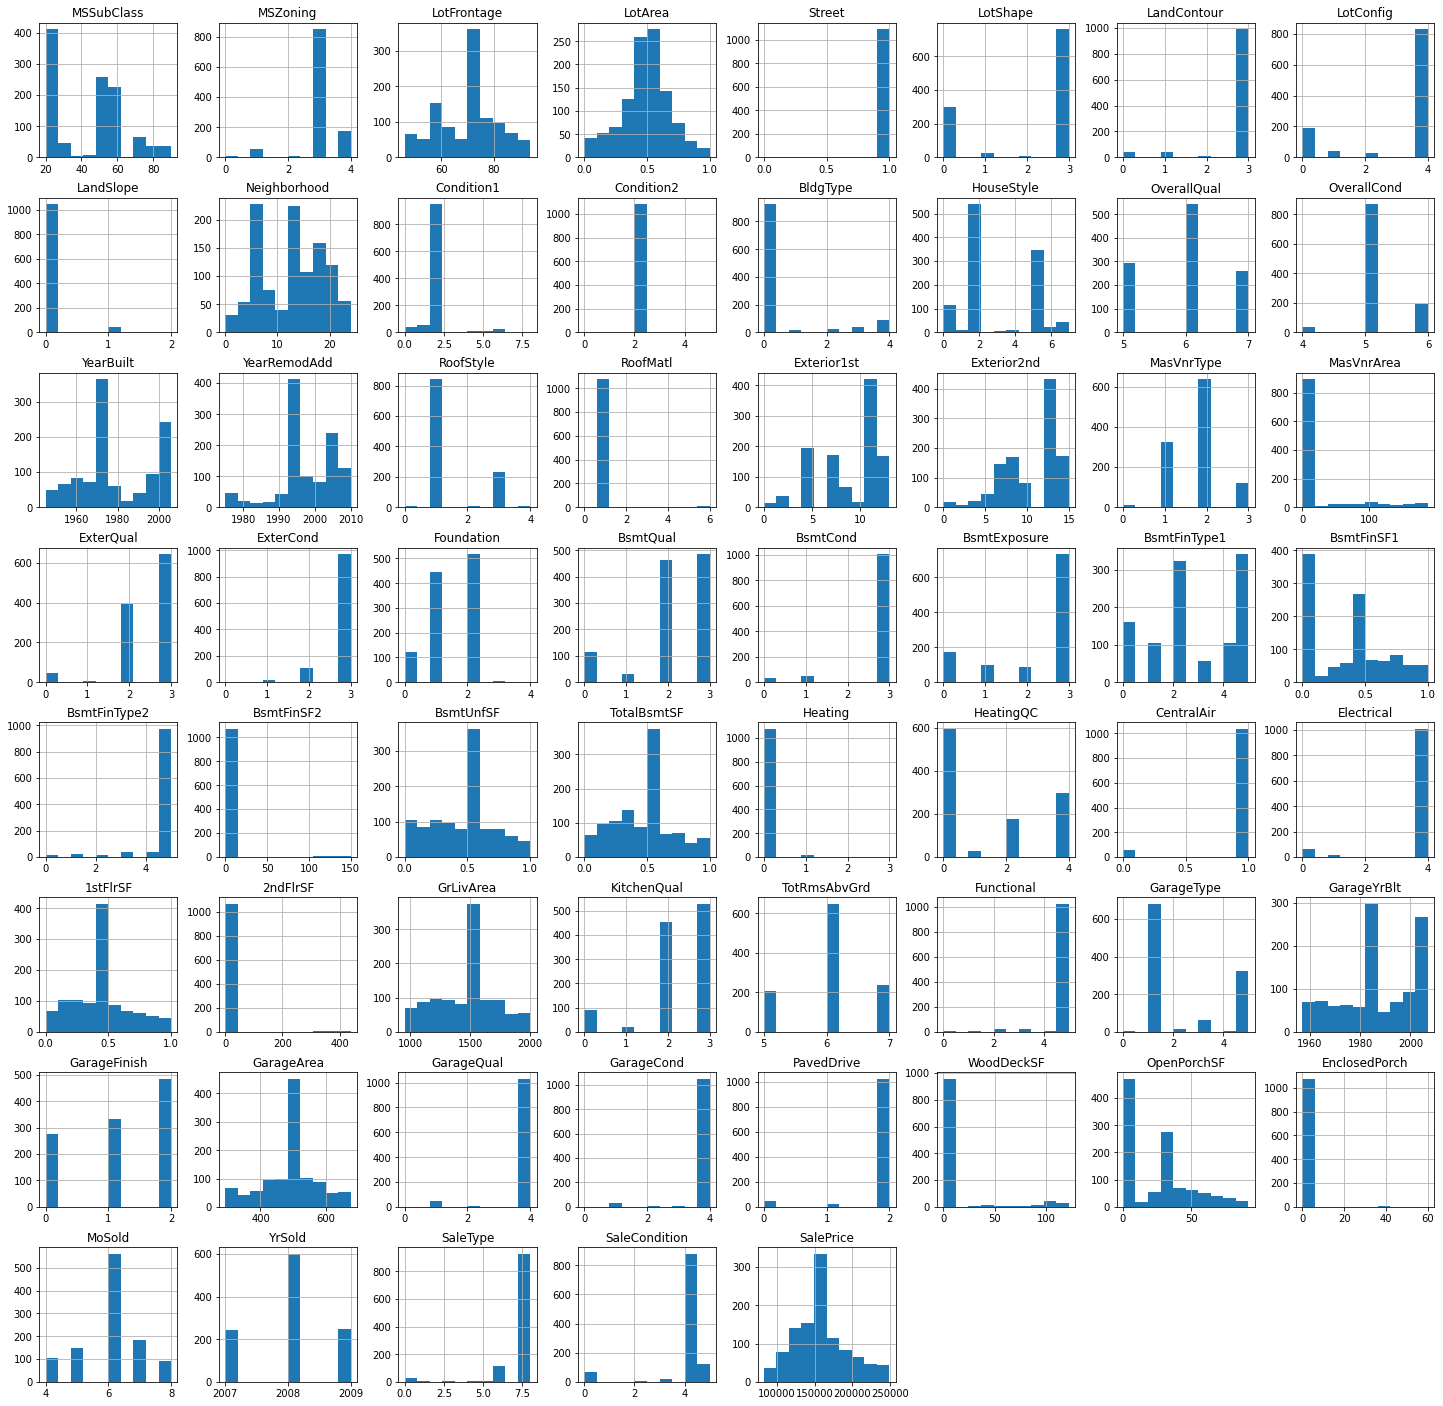

In [ ]:
data.hist(figsize=(25,25))

In [53]:

# Define the target variable
target = 'SalePrice'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation of each feature with the target variable
target_correlation = correlation_matrix[target]

# Filter features with positive correlation only and above a certain threshold
threshold = 0.1
selected_features = target_correlation[target_correlation > threshold].index.tolist()

# Create a new DataFrame with only the selected features
data = data[selected_features]

# Optionally, you can include the target variable back in the DataFrame
data[target] = data[target]

data.head()


C:\Users\ACS\AppData\Local\Temp\ipykernel_20836\3656912744.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
C:\Users\ACS\AppData\Local\Temp\ipykernel_20836\3656912744.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target]


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,Foundation,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,SalePrice
0,65.0,8450.0,7.0,2003.0,2003.0,184.0,0.0,542.0,856.0,856.0,1710.0,6.0,2003.0,548.0,61.0,208500.0
1,80.0,9600.0,6.0,1976.0,1976.0,184.0,0.0,494.0,1262.0,1262.0,1262.0,6.0,1976.0,460.0,0.0,181500.0
2,68.0,11250.0,7.0,2001.0,2002.0,184.0,162.0,542.0,920.0,920.0,1786.0,6.0,2001.0,608.0,42.0,223500.0
3,60.0,9550.0,7.0,1972.0,1995.0,33.0,0.0,494.0,756.0,961.0,1717.0,7.0,1998.0,642.0,35.0,140000.0
4,84.0,14260.0,6.0,2000.0,2000.0,184.0,0.0,542.0,1145.0,1145.0,1456.0,6.0,2000.0,480.0,84.0,159500.0


In [ ]:
data=data.drop(['Electrical','CentralAir'],axis=1)

In [54]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [55]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3)

In [58]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression")
print("Test Score:", ridge.score(X_test, y_test) * 100)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression")
print("Test Score:", lasso.score(X_test, y_test) * 100)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Ridge Regression
Test Score: 47.64292217409681
RMSE: 27037.59605738118
Lasso Regression
Test Score: 47.650604113505054
RMSE: 27035.612478441824


In [57]:
from sklearn.svm import SVR

rf=SVR(C=5,kernel='rbf').fit(xtr,ytr)
print("test score",rf.score(xte,yte)*100)
print("train score",rf.score(xtr,ytr)*100)
pred=rf.predict(xte)
rmse = mean_squared_error(yte, pred)
print("rmse",rmse)
print("mse",mean_squared_error(yte, pred))


test score -0.5271427509880855
train score -1.857594256791617
rmse 1370707248.7244313
mse 1370707248.7244313


In [1]:
import pandas as pd 
data=pd.read_csv('house_price.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
data=data.drop({'MiscFeature','Fence','PoolQC','Alley','Id','FireplaceQu'},axis=1)

In [3]:
data=data.dropna()

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='O':
        data[i]=enc.fit_transform(data[i])

In [11]:
X=data.drop("SalePrice",axis=1)
y=data['SalePrice']